# 선형회귀 리뷰

In [3]:
from sklearn.datasets import load_boston

boston = load_boston()

boston # -> dict와 흡사. 데이터를 한눈에 보기 힘듬.-> DF변환
import pandas as pd

boston_df = pd.DataFrame(
    boston["data"],
    columns=boston["feature_names"]
)
boston_df["price"] = boston["target"]
boston_df

C:\Users\onegt\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [4]:
# 데이터 분리
X = boston_df.drop(columns="price")
y = boston_df["price"]

# 훈련, 평가 데이터로 분리
from sklearn.model_selection import train_test_split
x_tr,x_te,y_tr,y_te = train_test_split(
    X,y,random_state=0
)

In [5]:
#선형회귀
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x_tr,y_tr)
print(f"W:{model.coef_}") 
print(f"b:{model.intercept_}")

W:[-1.17735289e-01  4.40174969e-02 -5.76814314e-03  2.39341594e+00
 -1.55894211e+01  3.76896770e+00 -7.03517828e-03 -1.43495641e+00
  2.40081086e-01 -1.12972810e-02 -9.85546732e-01  8.44443453e-03
 -4.99116797e-01]
b:36.93325545711978


In [6]:
#성능점수
print(model.score(x_tr,y_tr), model.score(x_te, y_te))

0.7697699488741149 0.6354638433202124


In [8]:
#test점수가 낮아서 점수 향상을 위해 다향변환으로 접근
from sklearn.preprocessing import PolynomialFeatures
P = PolynomialFeatures(degree=2, include_bias=False) #2차항 추가
X_poly = P.fit_transform(X)
pd.DataFrame(X_poly, columns=P.get_feature_names_out())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,TAX^2,TAX PTRATIO,TAX B,TAX LSTAT,PTRATIO^2,PTRATIO B,PTRATIO LSTAT,B^2,B LSTAT,LSTAT^2
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,...,87616.0,4528.8,117482.40,1474.08,234.09,6072.570,76.194,157529.6100,1976.5620,24.8004
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,...,58564.0,4307.6,96049.80,2211.88,316.84,7064.820,162.692,157529.6100,3627.6660,83.5396
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,...,58564.0,4307.6,95064.86,975.26,316.84,6992.374,71.734,154315.4089,1583.1049,16.2409
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,...,49284.0,4151.4,87607.86,652.68,349.69,7379.581,54.978,155732.8369,1160.2122,8.6436
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,...,49284.0,4151.4,88111.80,1183.26,349.69,7422.030,99.671,157529.6100,2115.4770,28.4089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,...,74529.0,5733.0,107013.27,2639.91,441.00,8231.790,203.070,153656.1601,3790.5433,93.5089
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,...,74529.0,5733.0,108353.70,2478.84,441.00,8334.900,190.680,157529.6100,3603.8520,82.4464
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,...,74529.0,5733.0,108353.70,1539.72,441.00,8334.900,118.440,157529.6100,2238.5160,31.8096
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,...,74529.0,5733.0,107411.85,1769.04,441.00,8262.450,136.080,154802.9025,2549.5560,41.9904


In [10]:
# 훈련, 평가 데이터로 분리
from sklearn.model_selection import train_test_split
x_tr,x_te,y_tr,y_te = train_test_split(
    X,y,random_state=0
)
#선형회귀
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x_tr,y_tr)
#성능점수
print(model.score(x_tr,y_tr), model.score(x_te, y_te))

0.7697699488741149 0.6354638433202124


In [13]:
# 3차항 변환
from sklearn.preprocessing import PolynomialFeatures
P = PolynomialFeatures(degree=3, include_bias=False) #3차항 추가
X_poly = P.fit_transform(X)
# 훈련, 평가 데이터로 분리
from sklearn.model_selection import train_test_split
x_tr,x_te,y_tr,y_te = train_test_split(
    X_poly,y,random_state=0
)
#선형회귀
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x_tr,y_tr)
#성능점수
print(model.score(x_tr,y_tr), model.score(x_te, y_te))

1.0 -9443.83441649148


In [14]:
# 5차항 변환
from sklearn.preprocessing import PolynomialFeatures
P = PolynomialFeatures(degree=5, include_bias=False) #5차항 추가
X_poly = P.fit_transform(X)
# 훈련, 평가 데이터로 분리
from sklearn.model_selection import train_test_split
x_tr,x_te,y_tr,y_te = train_test_split(
    X_poly,y,random_state=0
)
#선형회귀
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x_tr,y_tr)
#성능점수
print(model.score(x_tr,y_tr), model.score(x_te, y_te))

1.0 -135.30506300814213


# Ridge

In [16]:
# Ridge 회귀 적용(L2규제)

#정규화
from sklearn.preprocessing import MinMaxScaler
X_sc = MinMaxScaler().fit_transform(X)

# 3차항 변환
from sklearn.preprocessing import PolynomialFeatures
P = PolynomialFeatures(degree=3, include_bias=False) #5차항 추가
X_poly = P.fit_transform(X_sc)

# 훈련, 평가 데이터로 분리
from sklearn.model_selection import train_test_split
x_tr,x_te,y_tr,y_te = train_test_split(
    X_poly,y,random_state=0
)

#선형회귀
from sklearn.linear_model import Ridge
model = Ridge().fit(x_tr,y_tr)
#성능점수
print(model.score(x_tr,y_tr), model.score(x_te, y_te))

0.9242749146283596 0.7865342899841068


In [17]:
ridge01 = Ridge(alpha=0.1).fit(boston['data'], boston['target'])
ridge01_coef = pd.Series(ridge01.coef_, index=boston['feature_names'])

ridge1 = Ridge(alpha=1).fit(boston['data'], boston['target'])
ridge1_coef = pd.Series(ridge1.coef_, index=boston['feature_names'])

ridge10 = Ridge(alpha=10).fit(boston['data'], boston['target'])
ridge10_coef = pd.Series(ridge10.coef_, index=boston['feature_names'])

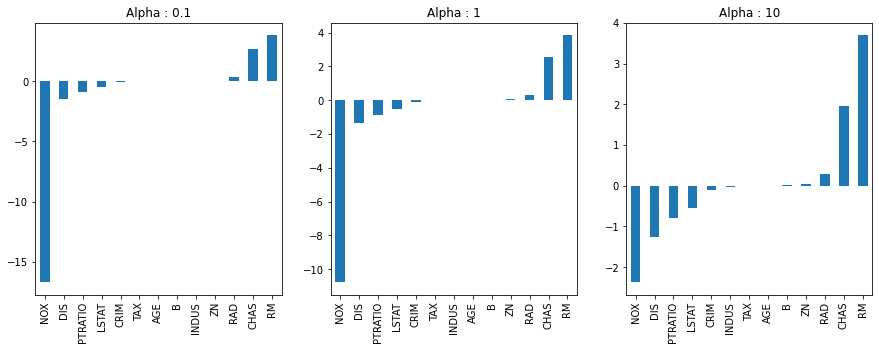

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
ridge01_coef.sort_values().plot(kind='bar')
plt.title('Alpha : 0.1')
plt.subplot(1, 3, 2)
ridge1_coef.sort_values().plot(kind='bar')
plt.title('Alpha : 1')
plt.subplot(1, 3, 3)
ridge10_coef.sort_values().plot(kind='bar')
plt.title('Alpha : 10')
plt.show()

# Lasso

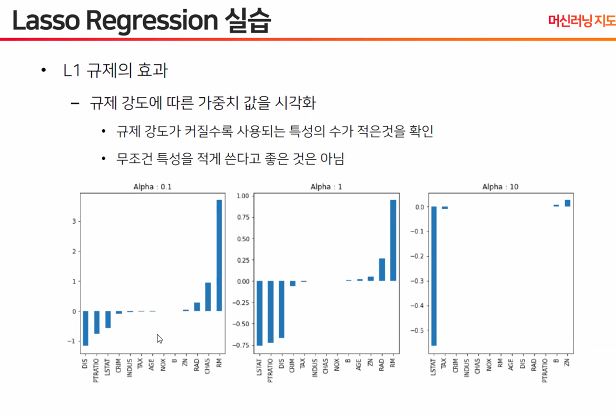

# Label Encoding VS One-Hot Encoding

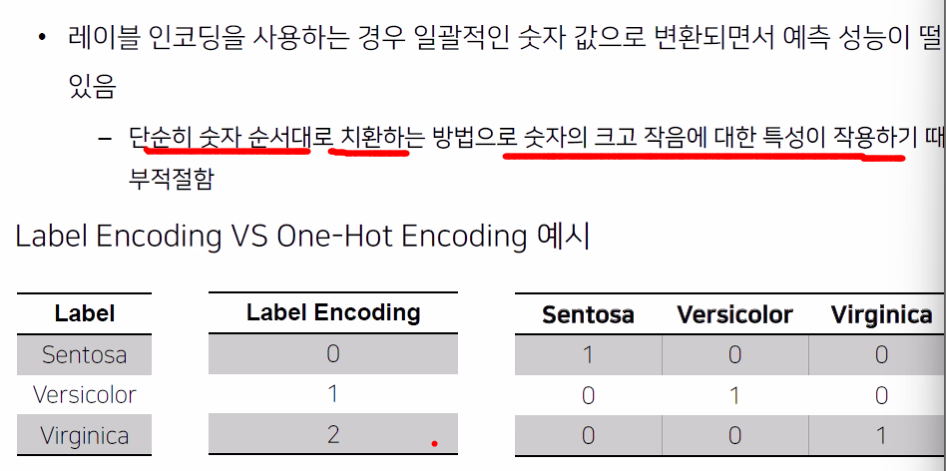

## One-Hot Encoding

### 팁 데이터 셋

In [19]:
import seaborn as sns
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [23]:
# 원핫인코딩
import pandas as pd
pd.get_dummies(tips[["sex"]])

,sex_Male,sex_Female
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
239,1,0
240,0,1
241,1,0
242,1,0


In [24]:
pd.get_dummies(tips, columns=["sex"])
#sex칼럼이 없어지고 sex원핫인코딩 한 칼럼만 있음

,total_bill,tip,smoker,day,time,size,sex_Male,sex_Female
0,16.99,1.01,No,Sun,Dinner,2,0,1
1,10.34,1.66,No,Sun,Dinner,3,1,0
2,21.01,3.50,No,Sun,Dinner,3,1,0
3,23.68,3.31,No,Sun,Dinner,2,1,0
4,24.59,3.61,No,Sun,Dinner,4,0,1
...,...,...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3,1,0
240,27.18,2.00,Yes,Sat,Dinner,2,0,1
241,22.67,2.00,Yes,Sat,Dinner,2,1,0
242,17.82,1.75,No,Sat,Dinner,2,1,0


In [32]:
tips_ohe = pd.get_dummies(
    tips, 
    columns=["sex","smoker","day","time"])
tips_ohe

,total_bill,tip,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
0,16.99,1.01,2,0,1,0,1,0,0,0,1,0,1
1,10.34,1.66,3,1,0,0,1,0,0,0,1,0,1
2,21.01,3.50,3,1,0,0,1,0,0,0,1,0,1
3,23.68,3.31,2,1,0,0,1,0,0,0,1,0,1
4,24.59,3.61,4,0,1,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,1,0,0,1,0,0,1,0,0,1
240,27.18,2.00,2,0,1,1,0,0,0,1,0,0,1
241,22.67,2.00,2,1,0,1,0,0,0,1,0,0,1
242,17.82,1.75,2,1,0,0,1,0,0,1,0,0,1


In [33]:
# 분할
y = tips_ohe["tip"]
X = tips_ohe.drop(columns="tip")

In [34]:
# 훈련, 평가 데이터로 분리
from sklearn.model_selection import train_test_split
x_tr,x_te,y_tr,y_te = train_test_split(
    X,y,random_state=0
)

#선형회귀
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x_tr,y_tr)
#성능점수
print(model.score(x_tr,y_tr), model.score(x_te, y_te))

0.43718265714767146 0.515660444662607


# Logistic Regression
- 회귀가 붙었어도 알고리즘임
- 확률값이 반환됨 (확률은 실수값임. 0~1 값)
- 선형회귀에다가 통계를 적용시켜놓은 것
- 통계니까 확률이 나와서 연속형 데이터로 이름이 붙었음
- 확률에 따라서 참,거짓 형태로 이진분류의 용도로 많이 쓰임
- 그러다 보니 분류용 알고리즘임
- '회귀 알고리즘이 아닌것을 고르시오' 그러면 얘임

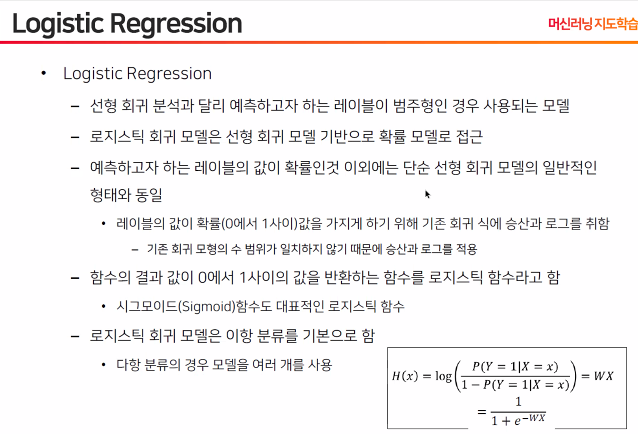

# 위스콘신 주립대학 유방암 진단데이터

In [40]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

#
y = cancer["target"]
X = cancer["data"]
#
# 훈련, 평가 데이터로 분리
from sklearn.model_selection import train_test_split
x_tr,x_te,y_tr,y_te = train_test_split(
    X,y,random_state=0,stratify=y
)
# 모델'
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=10000).fit(x_tr, y_tr)
print(model.score(x_tr, y_tr), model.score(x_te, y_te), )

# 모델'
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier().fit(x_tr, y_tr)
print(model.score(x_tr, y_tr), model.score(x_te, y_te), )


0.9671361502347418 0.9370629370629371
0.9460093896713615 0.916083916083916


# 타이타닉 데이터 생존율 예측

In [45]:
import seaborn as sns
ti = sns.load_dataset("titanic")

# 결측치 처리
ti["age"] = ti["age"].fillna(ti["age"].mean())

#
y = ti["survived"]
X = ti[["pclass","age","sibsp","parch"]]
#
# 훈련, 평가 데이터로 분리
from sklearn.model_selection import train_test_split
x_tr,x_te,y_tr,y_te = train_test_split(
    X,y,random_state=0,stratify=y
)
# 모델'
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=10000).fit(x_tr, y_tr)
print(model.score(x_tr, y_tr), model.score(x_te, y_te), )

# 모델'
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier().fit(x_tr, y_tr)
print(model.score(x_tr, y_tr), model.score(x_te, y_te), )

# 훈련 정확도는 knn이 더 높은데 test점수는 logistic이 더 높음
# 중요한건 test점수임 , test기준으로 높은 모델을 선택하는게 맞음

0.7050898203592815 0.6816143497757847
0.7679640718562875 0.672645739910314


# 손글씨 데이터셋

In [46]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

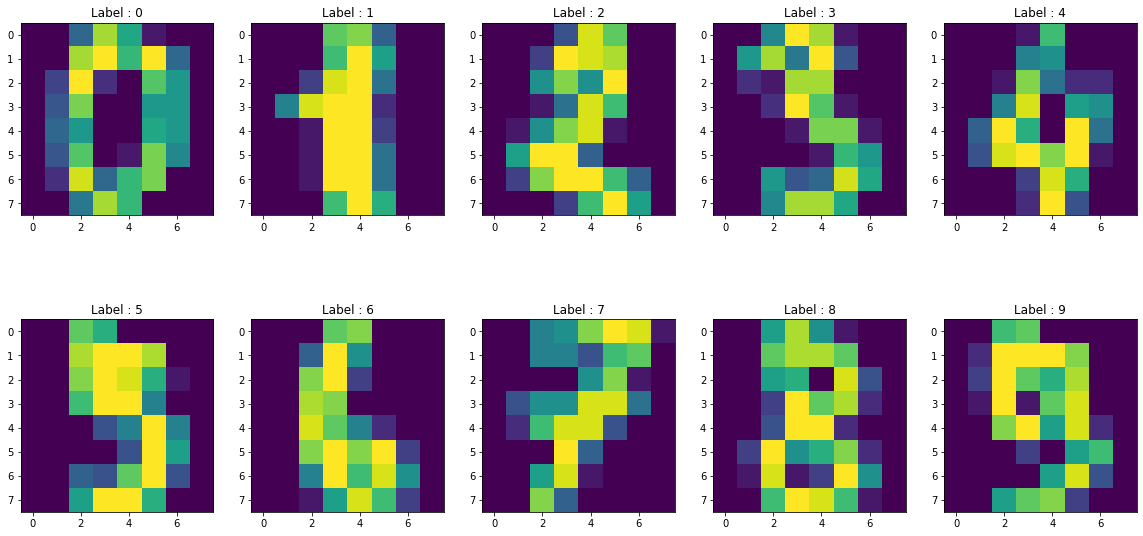

In [51]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digits = load_digits()

plt.figure(figsize=(20, 10))
for index, image in enumerate(digits['images'][:10]):
    plt.subplot(2, 5, index+1)
    plt.imshow(image)
    plt.title(f'Label : {digits.target[index]}')
plt.show()

In [50]:
# 밝을수록 값이 큰것. 여기선 노란색이 젤 값이 큰것
print(digits["images"][0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [53]:
digits["data"][0].reshape(8,8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [54]:
x_train, x_test, y_train, y_test = train_test_split(digits['data'],
                                                    digits['target'],
                                                    stratify=digits['target'],
                                                    random_state=0)

model = LogisticRegression(max_iter=10000).fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test, y_test)

(1.0, 0.9644444444444444)

# 분류분석 성능평가

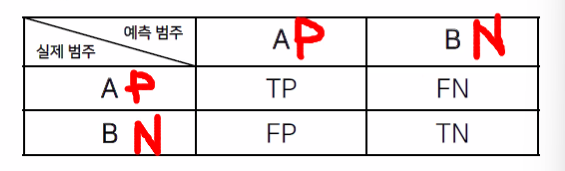
- positive
- nagative

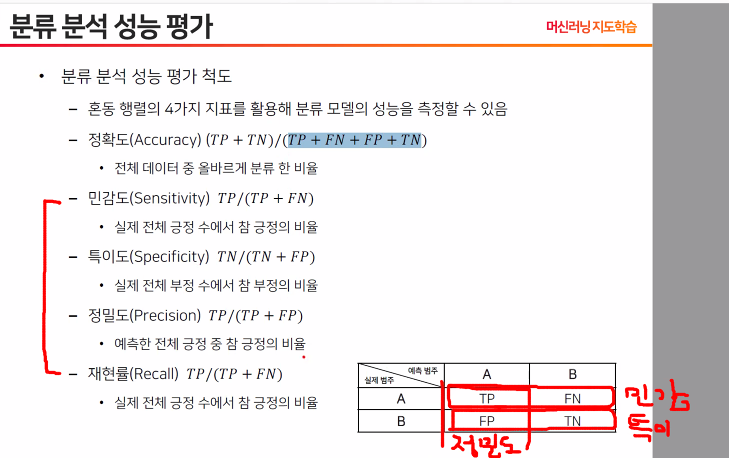
- 재현율과 민감도는 동일

In [55]:
# 이진 분류를 위한 데이터세트 준비
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X, Y = cancer['data'], cancer['target']

# Train Test 분할
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [56]:
# 분류 알고리즘 생성 및 예측
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

knn = KNeighborsClassifier(n_neighbors=10).fit(X_train, Y_train)
knn_pred = knn.predict(X_test)

lr = LogisticRegression().fit(X_train, Y_train)
lr_pred = lr.predict(X_test)

dtc = DecisionTreeClassifier(max_depth=3).fit(X_train, Y_train)
dtc_pred = dtc.predict(X_test)

rfc = RandomForestClassifier(max_depth=3).fit(X_train, Y_train)
rfc_pred = rfc.predict(X_test)

gbc = GradientBoostingClassifier(max_depth=3).fit(X_train, Y_train)
gbc_pred = gbc.predict(X_test)

svm = SVC().fit(X_train, Y_train)
svm_pred = svm.predict(X_test)

mlp = MLPClassifier().fit(X_train, Y_train)
mlp_pred = mlp.predict(X_test)

C:\Users\onegt\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [57]:
# 모델별 정확도 (accuracy) 출력
print('KNN 정확도 : %.2f%%' % (knn.score(X_test, Y_test) * 100))
print('Logistic Regression 정확도 : %.2f%%' % (lr.score(X_test, Y_test) * 100))
print('Decision Tree 정확도 : %.2f%%' % (dtc.score(X_test, Y_test) * 100))
print('Random Forest 정확도 : %.2f%%' % (rfc.score(X_test, Y_test) * 100))
print('Gradient Boosting 정확도 : %.2f%%' % (gbc.score(X_test, Y_test) * 100))
print('SVM 정확도 : %.2f%%' % (svm.score(X_test, Y_test) * 100))
print('MLP 정확도 : %.2f%%' % (mlp.score(X_test, Y_test) * 100))

KNN 정확도 : 91.61%
Logistic Regression 정확도 : 93.01%
Decision Tree 정확도 : 93.01%
Random Forest 정확도 : 93.71%
Gradient Boosting 정확도 : 95.10%
SVM 정확도 : 89.51%
MLP 정확도 : 90.91%


In [58]:
# ROC Curve를 위한 fpr 및 tpr 계산
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(Y_test, knn_pred) # 실제값 예측값
fpr, tpr, thresholds

(array([0.        , 0.16666667, 1.        ]),
 array([0.        , 0.96629213, 1.        ]),
 array([2, 1, 0]))

In [59]:
# AUC 계산
from sklearn.metrics import auc
knn_auc = auc(fpr, tpr) # RoC Curve를 그리는 요소인 fpr, tpr
knn_auc

0.899812734082397

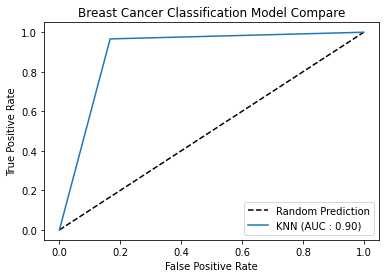

In [60]:
# Roc Curve 시각화
import matplotlib.pyplot as plt
label = "KNN (AUC : %.2f)" % knn_auc 
plt.plot([0, 1], [0, 1], 'k--', label="Random Prediction")
plt.plot(fpr, tpr, label=label)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Breast Cancer Classification Model Compare')
plt.legend()
plt.show()

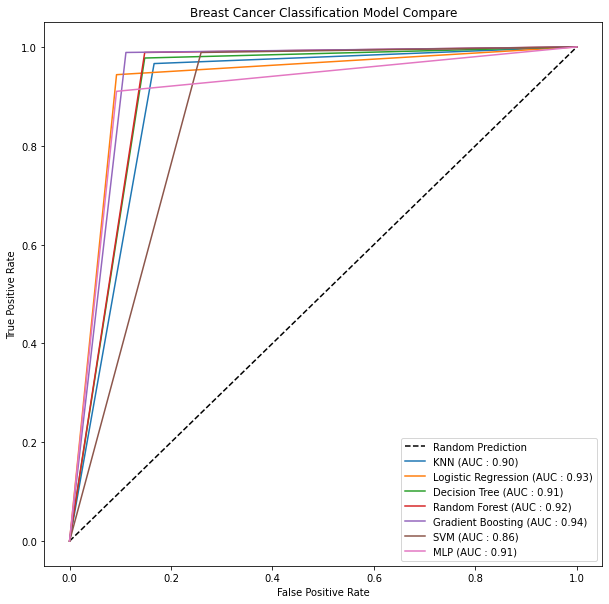

In [61]:
# 분류 알고리즘 ROC Curve 시각화
plt.figure(figsize=(10,10))

plt.plot([0, 1], [0, 1], 'k--', label="Random Prediction")

alogs = ['KNN', 'Logistic Regression', 'Decision Tree', 'Random Forest', 
        'Gradient Boosting','SVM', 'MLP']
preds = [knn_pred, lr_pred, dtc_pred, rfc_pred, gbc_pred, svm_pred, mlp_pred]

for alog, pred in zip(alogs, preds):
    fpr, tpr, thresholds = roc_curve(Y_test, pred)
    roc_auc = auc(fpr, tpr)
    label = "%s (AUC : %.2f)" % (alog, roc_auc)
    plt.plot(fpr, tpr, label=label)
    
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Breast Cancer Classification Model Compare')
plt.legend()
plt.show()

## 타이타닉 데이터셋의 알고리즘별 분류분석 평가 해보기
- 성별도 특성에 포함시키기

In [75]:
pd.get_dummies(ti, columns=["sex"])

,survived,pclass,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,sex_female,sex_male
0,0,3,22.000000,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,0,1
1,1,1,38.000000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1,0
2,1,3,26.000000,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,1,0
3,1,1,35.000000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1,0
4,0,3,35.000000,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,0,1
887,1,1,19.000000,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,1,0
888,0,3,29.699118,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,1,0
889,1,1,26.000000,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,0,1


KNN 정확도 : 79.82%
Logistic Regression 정확도 : 80.27%
Decision Tree 정확도 : 82.51%
Random Forest 정확도 : 83.41%
Gradient Boosting 정확도 : 83.86%
SVM 정확도 : 64.57%
MLP 정확도 : 83.41%


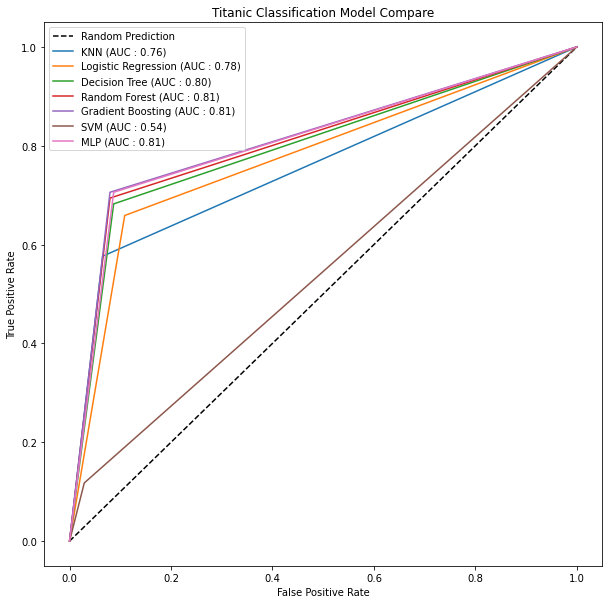

In [87]:
import seaborn as sns
ti = sns.load_dataset("titanic")

#성별 원핫인코딩
import pandas as pd
ti_ohe = pd.get_dummies(
    ti,
    columns = ['sex']
)
ti_ohe.head()

# 결측치 처리
ti_ohe["age"] = ti_ohe["age"].fillna( ti_ohe["age"].mean() )

# 분할
Y = ti_ohe["survived"]
X = ti_ohe[["age","pclass","sibsp","parch","sex_female", "sex_male"]]

# 훈련, 평가 데이터로 분리
from sklearn.model_selection import train_test_split
x_tr,x_te,y_tr,y_te = train_test_split(
    X,Y,random_state=0,stratify=Y
)

# 분류 알고리즘 생성 및 예측
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

knn = KNeighborsClassifier(n_neighbors=10).fit(X_train, Y_train)
knn_pred = knn.predict(X_test)

lr = LogisticRegression().fit(X_train, Y_train)
lr_pred = lr.predict(X_test)

dtc = DecisionTreeClassifier(max_depth=3).fit(X_train, Y_train)
dtc_pred = dtc.predict(X_test)

rfc = RandomForestClassifier(max_depth=3).fit(X_train, Y_train)
rfc_pred = rfc.predict(X_test)

gbc = GradientBoostingClassifier(max_depth=3).fit(X_train, Y_train)
gbc_pred = gbc.predict(X_test)

svm = SVC().fit(X_train, Y_train)
svm_pred = svm.predict(X_test)

mlp = MLPClassifier().fit(X_train, Y_train)
mlp_pred = mlp.predict(X_test)

# 모델별 정확도 (accuracy) 출력
print('KNN 정확도 : %.2f%%' % (knn.score(X_test, Y_test) * 100))
print('Logistic Regression 정확도 : %.2f%%' % (lr.score(X_test, Y_test) * 100))
print('Decision Tree 정확도 : %.2f%%' % (dtc.score(X_test, Y_test) * 100))
print('Random Forest 정확도 : %.2f%%' % (rfc.score(X_test, Y_test) * 100))
print('Gradient Boosting 정확도 : %.2f%%' % (gbc.score(X_test, Y_test) * 100))
print('SVM 정확도 : %.2f%%' % (svm.score(X_test, Y_test) * 100))
print('MLP 정확도 : %.2f%%' % (mlp.score(X_test, Y_test) * 100))

# ROC Curve를 위한 fpr 및 tpr 계산
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(Y_test, knn_pred) # 실제값 예측값
fpr, tpr, thresholds

# AUC 계산
from sklearn.metrics import auc
knn_auc = auc(fpr, tpr) # RoC Curve를 그리는 요소인 fpr, tpr
knn_auc

# 분류 알고리즘 ROC Curve 시각화
plt.figure(figsize=(10,10))

plt.plot([0, 1], [0, 1], 'k--', label="Random Prediction")

alogs = ['KNN', 'Logistic Regression', 'Decision Tree', 'Random Forest', 
        'Gradient Boosting','SVM', 'MLP']
preds = [knn_pred, lr_pred, dtc_pred, rfc_pred, gbc_pred, svm_pred, mlp_pred]

for alog, pred in zip(alogs, preds):
    fpr, tpr, thresholds = roc_curve(Y_test, pred)
    roc_auc = auc(fpr, tpr)
    label = "%s (AUC : %.2f)" % (alog, roc_auc)
    plt.plot(fpr, tpr, label=label)
    
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Titanic Classification Model Compare')
plt.legend()
plt.show()

KNN 정확도 : 79.82%
Logistic Regression 정확도 : 80.27%
Decision Tree 정확도 : 82.51%
Random Forest 정확도 : 82.96%
Gradient Boosting 정확도 : 83.86%
SVM 정확도 : 64.57%
MLP 정확도 : 83.41%


C:\Users\onegt\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


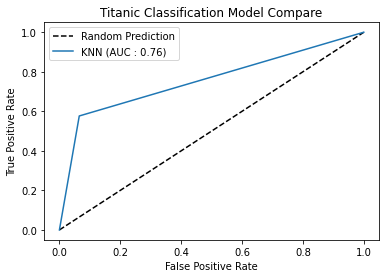

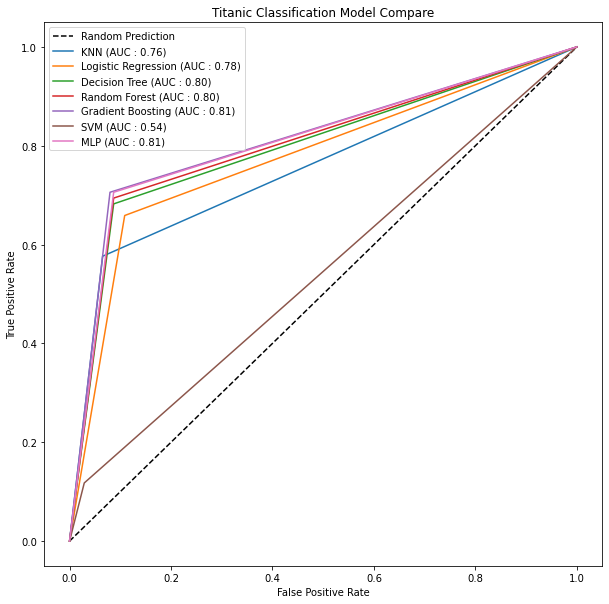

In [86]:
# 이진 분류를 위한 데이터세트 준비
import seaborn as sns

ti = sns.load_dataset('titanic')
ti['age'] = ti['age'].fillna(ti['age'].mean()) # 결측치 제거

import pandas as pd
ti_ohe = pd.get_dummies(
    ti,
    columns=['sex']
)
ti_ohe

Y = ti_ohe['survived']
X = ti_ohe[["pclass","age","sibsp","parch","sex_male", "sex_female"]]

# 훈련, 평가 데이터로 분리
from sklearn.model_selection import train_test_split
x_tr,x_te,y_tr,y_te = train_test_split(
    X,Y,random_state=0,stratify=Y
)

# 분류 알고리즘 생성 및 예측
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

knn = KNeighborsClassifier(n_neighbors=10).fit(X_train, Y_train)
knn_pred = knn.predict(X_test)

lr = LogisticRegression().fit(X_train, Y_train)
lr_pred = lr.predict(X_test)

dtc = DecisionTreeClassifier(max_depth=3).fit(X_train, Y_train)
dtc_pred = dtc.predict(X_test)

rfc = RandomForestClassifier(max_depth=3).fit(X_train, Y_train)
rfc_pred = rfc.predict(X_test)

gbc = GradientBoostingClassifier(max_depth=3).fit(X_train, Y_train)
gbc_pred = gbc.predict(X_test)

svm = SVC().fit(X_train, Y_train)
svm_pred = svm.predict(X_test)

mlp = MLPClassifier().fit(X_train, Y_train)
mlp_pred = mlp.predict(X_test)

# 모델별 정확도 (accuracy) 출력
print('KNN 정확도 : %.2f%%' % (knn.score(X_test, Y_test) * 100))
print('Logistic Regression 정확도 : %.2f%%' % (lr.score(X_test, Y_test) * 100))
print('Decision Tree 정확도 : %.2f%%' % (dtc.score(X_test, Y_test) * 100))
print('Random Forest 정확도 : %.2f%%' % (rfc.score(X_test, Y_test) * 100))
print('Gradient Boosting 정확도 : %.2f%%' % (gbc.score(X_test, Y_test) * 100))
print('SVM 정확도 : %.2f%%' % (svm.score(X_test, Y_test) * 100))
print('MLP 정확도 : %.2f%%' % (mlp.score(X_test, Y_test) * 100))

# ROC Curve를 위한 fpr 및 tpr 계산
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(Y_test, knn_pred) # 실제값 예측값
fpr, tpr, thresholds

# AUC 계산
from sklearn.metrics import auc
knn_auc = auc(fpr, tpr) # RoC Curve를 그리는 요소인 fpr, tpr
knn_auc

# Roc Curve 시각화
import matplotlib.pyplot as plt
label = "KNN (AUC : %.2f)" % knn_auc 
plt.plot([0, 1], [0, 1], 'k--', label="Random Prediction")
plt.plot(fpr, tpr, label=label)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Titanic Classification Model Compare')
plt.legend()
plt.show()

# 분류 알고리즘 ROC Curve 시각화
plt.figure(figsize=(10,10))

plt.plot([0, 1], [0, 1], 'k--', label="Random Prediction")

alogs = ['KNN', 'Logistic Regression', 'Decision Tree', 'Random Forest', 
        'Gradient Boosting','SVM', 'MLP']
preds = [knn_pred, lr_pred, dtc_pred, rfc_pred, gbc_pred, svm_pred, mlp_pred]

for alog, pred in zip(alogs, preds):
    fpr, tpr, thresholds = roc_curve(Y_test, pred)
    roc_auc = auc(fpr, tpr)
    label = "%s (AUC : %.2f)" % (alog, roc_auc)
    plt.plot(fpr, tpr, label=label)
    
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Titanic Classification Model Compare')
plt.legend()
plt.show()